In [1]:
import h5py
import numpy as np

/mnt/bwpy/single/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load data
file = h5py.File('100_halos.hdf5', 'r')
fields = ["density", "temperature", "H_p1_fraction", "radial_velocity", "cell_mass"]
keys = list(file.keys())
# data = [[file[k][f].value for f in fields] for k in keys]
radius = np.linspace(0, 1, 64)
total_mass = np.array([file[k]["halo_mass"].value for k in keys])
used = np.array([file[k]["used"].value for k in keys])

In [3]:
# features
density = np.array([file[k]["density"].value for k in keys])
temperature = np.array([file[k]["temperature"].value for k in keys])
ionization = np.array([file[k]["H_p1_fraction"].value for k in keys])
radial_velocity = np.array([file[k]["radial_velocity"].value for k in keys])
cell_mass = np.array([file[k]["cell_mass"].value for k in keys])

In [4]:
max_density = np.array([max(h) for h in density])
min_density = np.array([min(h) for h in density])
max_temp = np.array([max(h) for h in temperature])
min_temp = np.array([min(h) for h in temperature])
peak_velocity = np.array([max(h) for h in radial_velocity])

In [5]:
def log_normalize(halo, feature):
    good = used[halo]
    ma = np.log10(feature[used].max())
    mi = np.log10(feature[used].min())
    normalized = (np.log10(feature[halo]) - mi)/(ma - mi)
    return good, normalized

In [6]:
def linear_normalize(halo, feature):
    good = used[halo]
    ma = feature[used].max()
    mi = feature[used].min()
    normalized = (feature[halo] - mi)/(ma - mi)
    return good, normalized

In [7]:
# global_good.sum()

In [8]:
# global_good.size

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
# plt.plot(radius, temperature[0])

In [12]:
%%capture
%run frechet_distance.ipynb

In [13]:
# test (unnormalized)
P = [radius, density[0]]
Q = [radius, temperature[0]]
frechetDist(P, Q)

8734.4208984375

In [16]:
def get_Frechet_distance(halo, featureA, featureB, norm_methodA="log", norm_methodB="log"):
    goodA, normalized_featureA = log_normalize(halo, featureA)
    goodB, normalized_featureB = log_normalize(halo, featureB)
    if norm_methodA=="linear":
        goodA, normalized_featureA = linear_normalize(halo, featureA)
    elif norm_methodB=="linear":
        goodB, normalized_featureB = linear_normalize(halo, featureB)
    good = (goodA & goodB)
    P = [radius[good], normalized_featureA[good]]
    Q = [radius[good], normalized_featureB[good]]
    result = frechetDist(P, Q)
    return result

In [27]:
# 0 = density, 1 = temperature, 2 = ionization fraction, 3 = cell mass, 4 = radial velocity
Fs01, Fs02, Fs03, Fs04 = [], [], [], []
Fs12, Fs13, Fs14 = [], [], []
Fs23, Fs24 = [], []
Fs34 = []

features = [density, temperature, ionization, cell_mass, radial_velocity]

for i in range(100):
    F01 = get_Frechet_distance(i, features[0], features[1])
    F02 = get_Frechet_distance(i, features[0], features[2])
    F03 = get_Frechet_distance(i, features[0], features[3])
    F04 = get_Frechet_distance(i, features[0], features[4], norm_methodB="linear")
    
    F12 = get_Frechet_distance(i, features[1], features[2])
    F13 = get_Frechet_distance(i, features[1], features[3])
    F14 = get_Frechet_distance(i, features[1], features[4], norm_methodB="linear")
    
    F23 = get_Frechet_distance(i, features[2], features[3])
    F24 = get_Frechet_distance(i, features[2], features[4], norm_methodB="linear")
    
    F34 = get_Frechet_distance(i, features[3], features[4], norm_methodB="linear")
    
    Fs01.append(F01)
    Fs02.append(F02)
    Fs03.append(F03)
    Fs04.append(F04)
    
    Fs12.append(F12)
    Fs13.append(F13)
    Fs14.append(F14)
    
    Fs23.append(F23)
    Fs24.append(F24)
    
    Fs34.append(F34)

/mnt/bwpy/single/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/mnt/bwpy/single/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/mnt/bwpy/single/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


In [28]:
plt.rcParams["figure.dpi"] = 150

In [29]:
# plt.hexbin(Fs01, Fs02, bins='log', gridsize=16)
# cb = plt.colorbar()
# cb.cmap.set_under('w')
# cb.set_clim(0.01, 0.5)

In [30]:
# plt.hexbin(Fs01, Fs12, bins='log', gridsize=16)
# cb = plt.colorbar()
# cb.cmap.set_under('w')

In [31]:
# plt.subplot(221)
# plt.scatter(Fs01, Fs02, c='k')
# plt.xlabel('F01')
# plt.ylabel('F02')
# plt.subplot(222)
# plt.scatter(Fs12, Fs02, c='k')
# plt.xlabel('F12')
# plt.ylabel('F02')
# plt.subplot(223)
# plt.scatter(Fs01, Fs12, c='k')
# plt.xlabel('F01')
# plt.ylabel('F12')

In [32]:
import seaborn as sns

In [33]:
sns.set(style="ticks")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


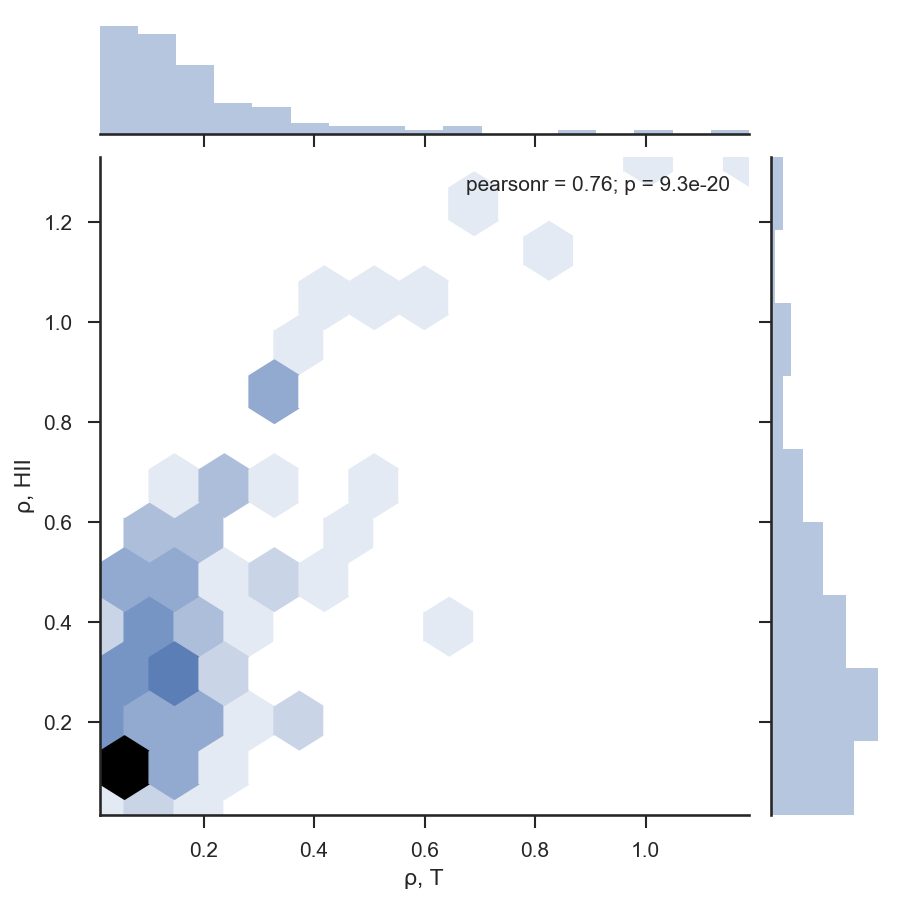

In [34]:
sns.jointplot(np.array(Fs01), np.array(Fs02), kind="hex").set_axis_labels("ρ, T", "ρ, HII")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


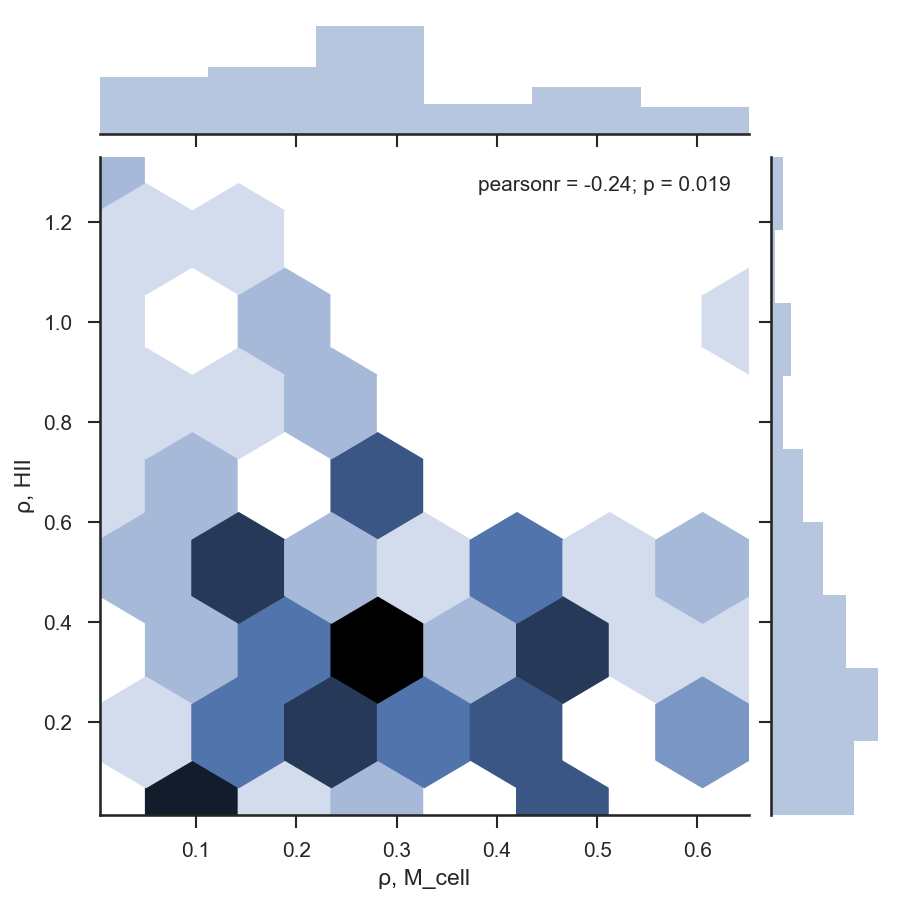

In [45]:
sns.jointplot(np.array(Fs03), np.array(Fs02), kind="hex").set_axis_labels("ρ, M_cell", "ρ, HII")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


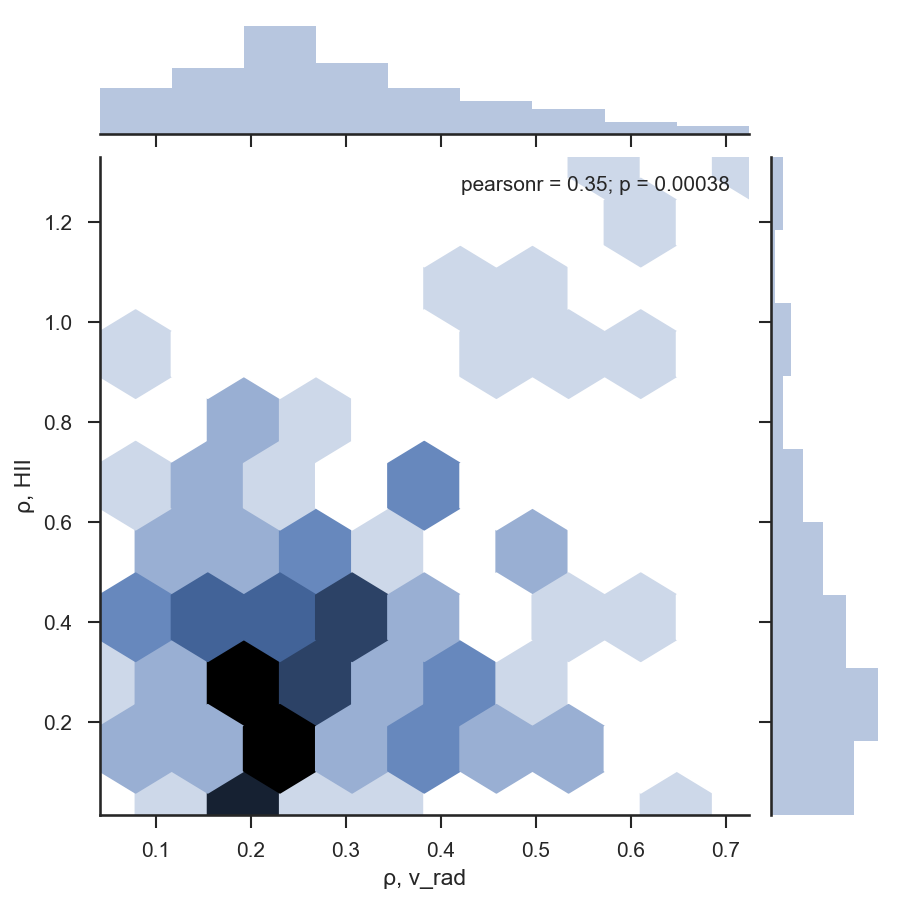

In [46]:
sns.jointplot(np.array(Fs04), np.array(Fs02), kind="hex").set_axis_labels("ρ, v_rad", "ρ, HII")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


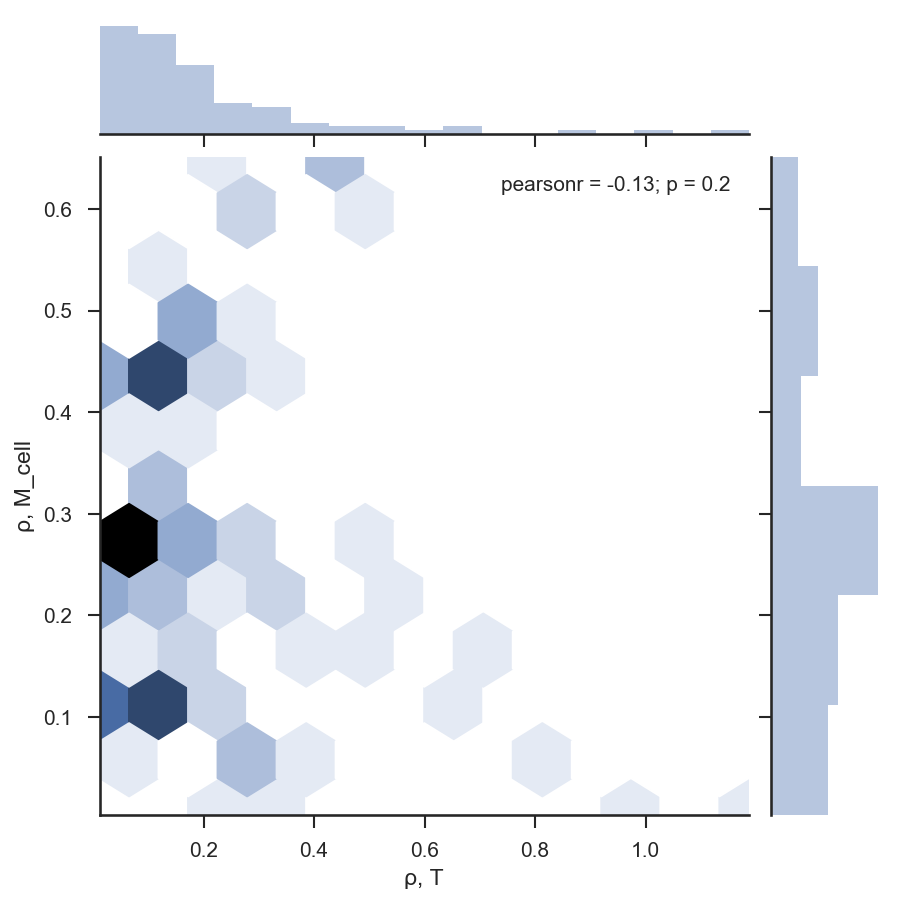

In [47]:
sns.jointplot(np.array(Fs01), np.array(Fs03), kind="hex").set_axis_labels("ρ, T", "ρ, M_cell")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


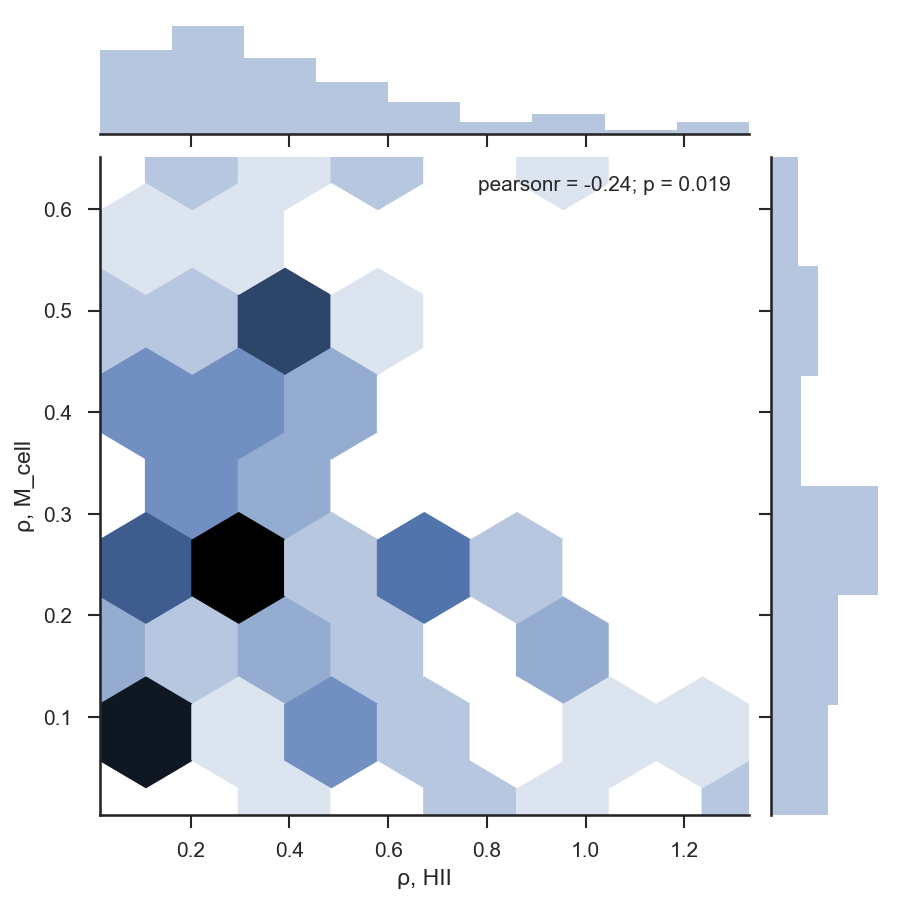

In [48]:
sns.jointplot(np.array(Fs02), np.array(Fs03), kind="hex").set_axis_labels("ρ, HII", "ρ, M_cell")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


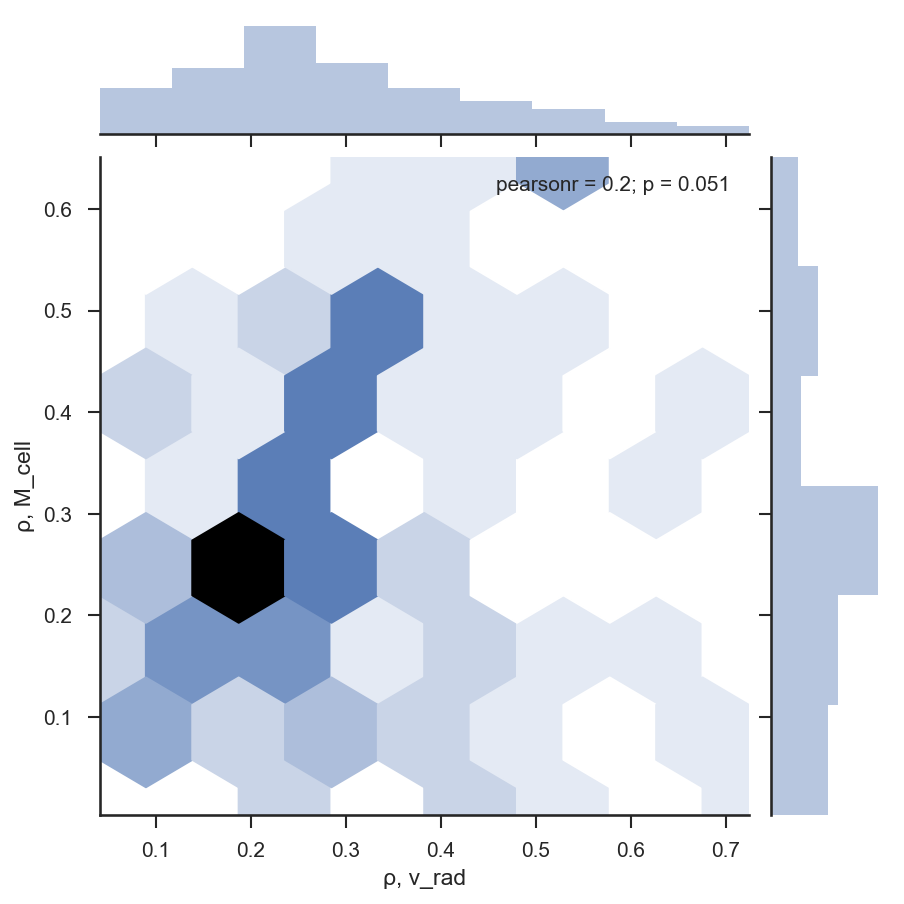

In [49]:
sns.jointplot(np.array(Fs04), np.array(Fs03), kind="hex").set_axis_labels("ρ, v_rad", "ρ, M_cell")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


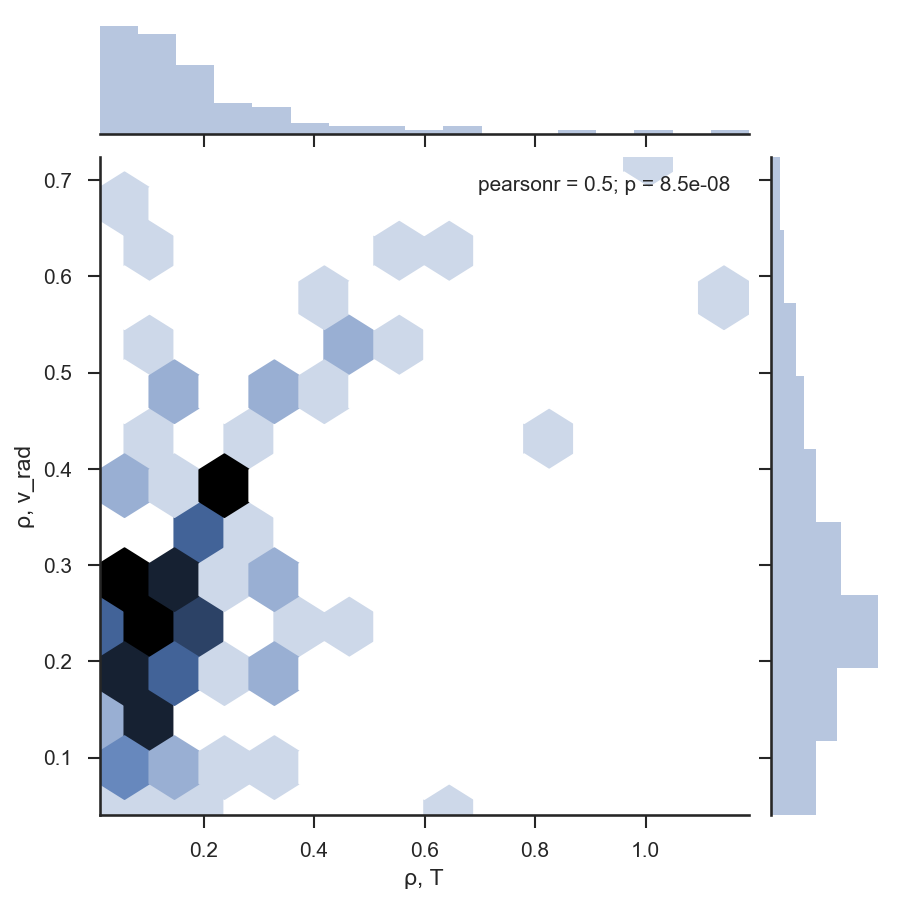

In [50]:
sns.jointplot(np.array(Fs01), np.array(Fs04), kind="hex").set_axis_labels("ρ, T", "ρ, v_rad")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


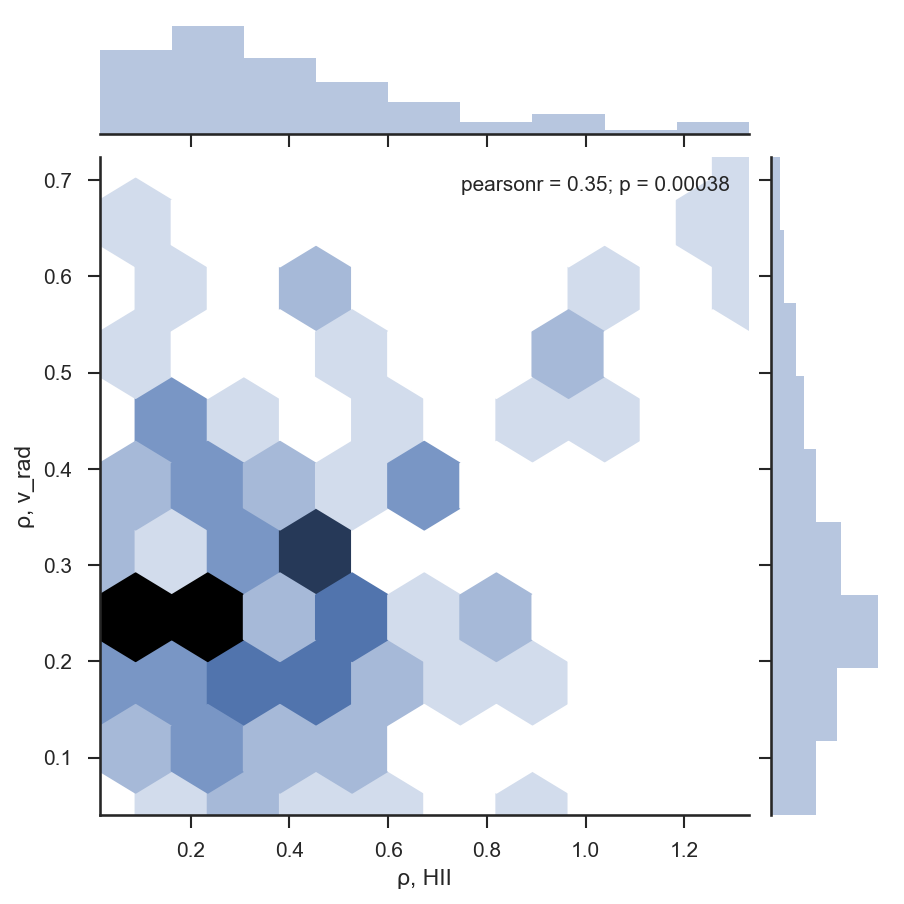

In [51]:
sns.jointplot(np.array(Fs02), np.array(Fs04), kind="hex").set_axis_labels("ρ, HII", "ρ, v_rad")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


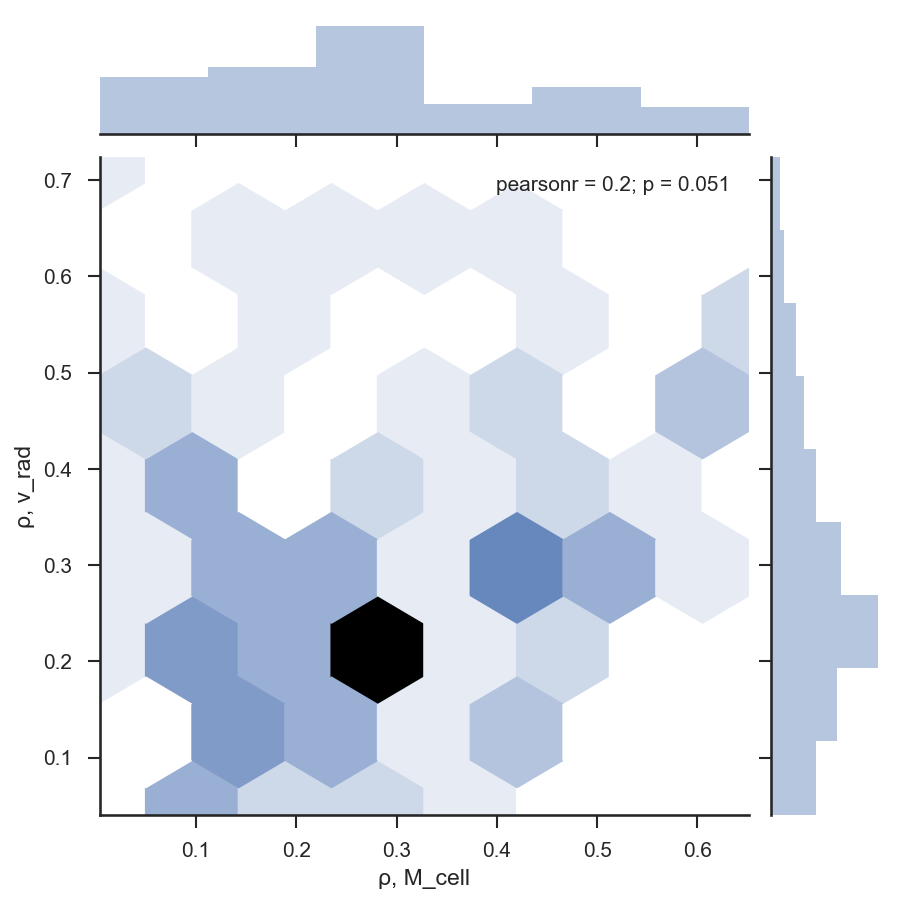

In [52]:
sns.jointplot(np.array(Fs03), np.array(Fs04), kind="hex").set_axis_labels("ρ, M_cell", "ρ, v_rad")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


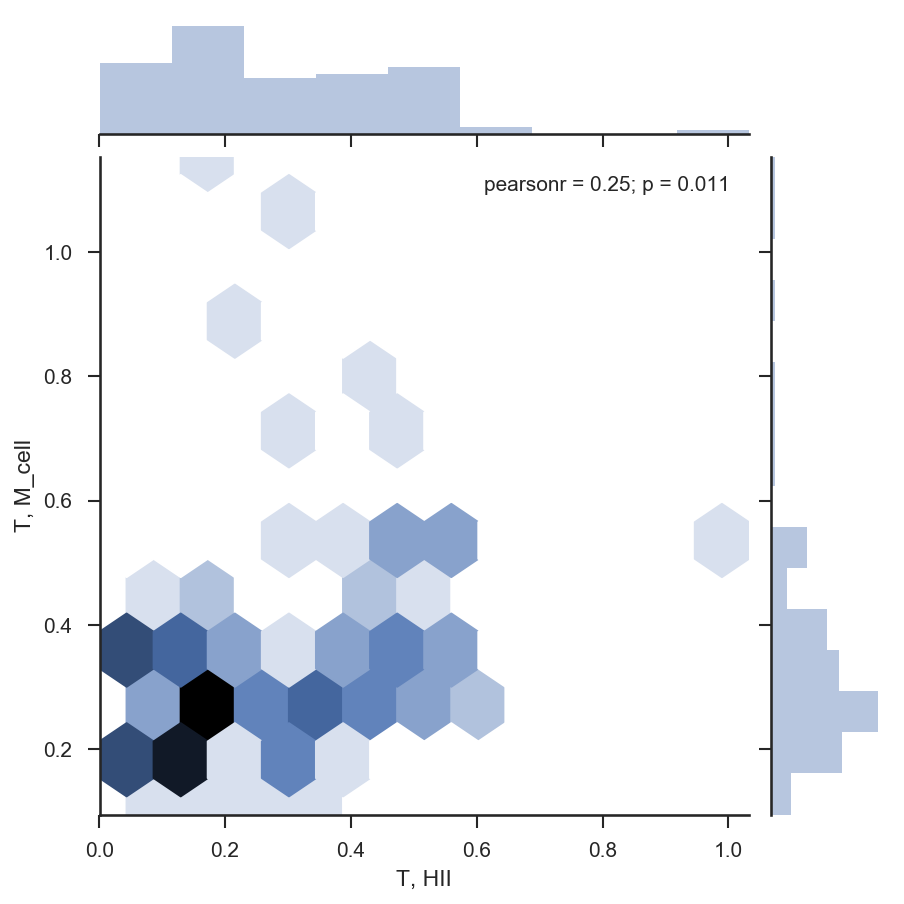

In [53]:
sns.jointplot(np.array(Fs12), np.array(Fs13), kind="hex").set_axis_labels("T, HII", "T, M_cell")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


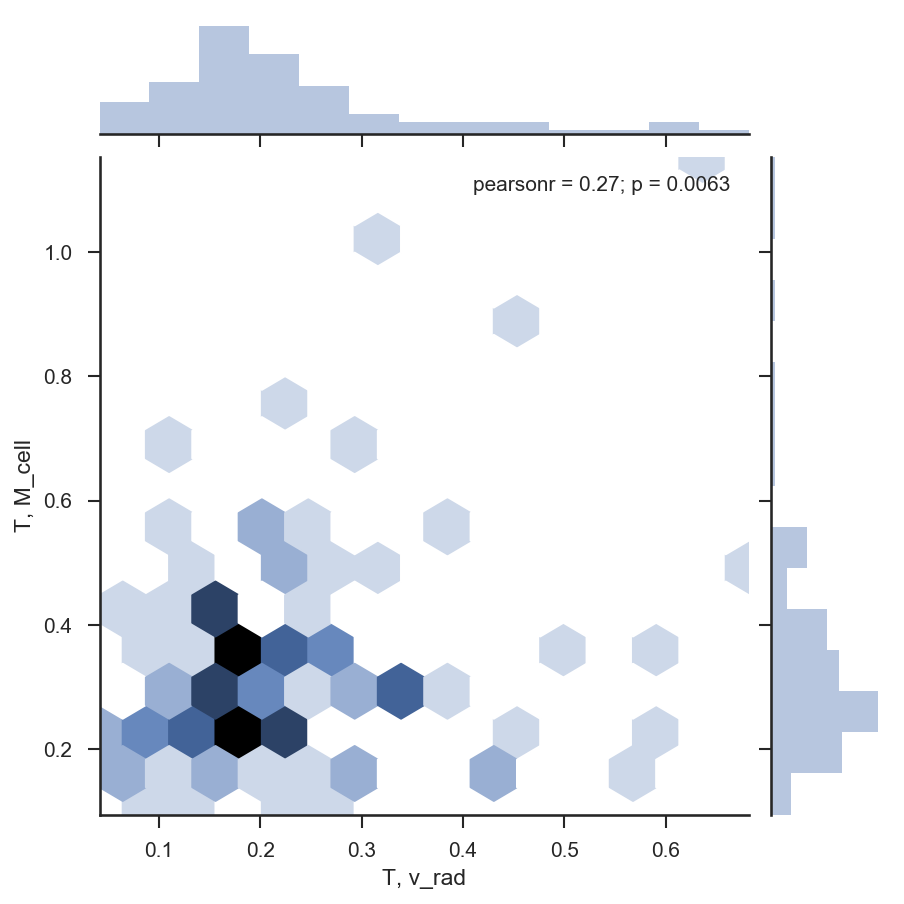

In [54]:
sns.jointplot(np.array(Fs14), np.array(Fs13), kind="hex").set_axis_labels("T, v_rad", "T, M_cell")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


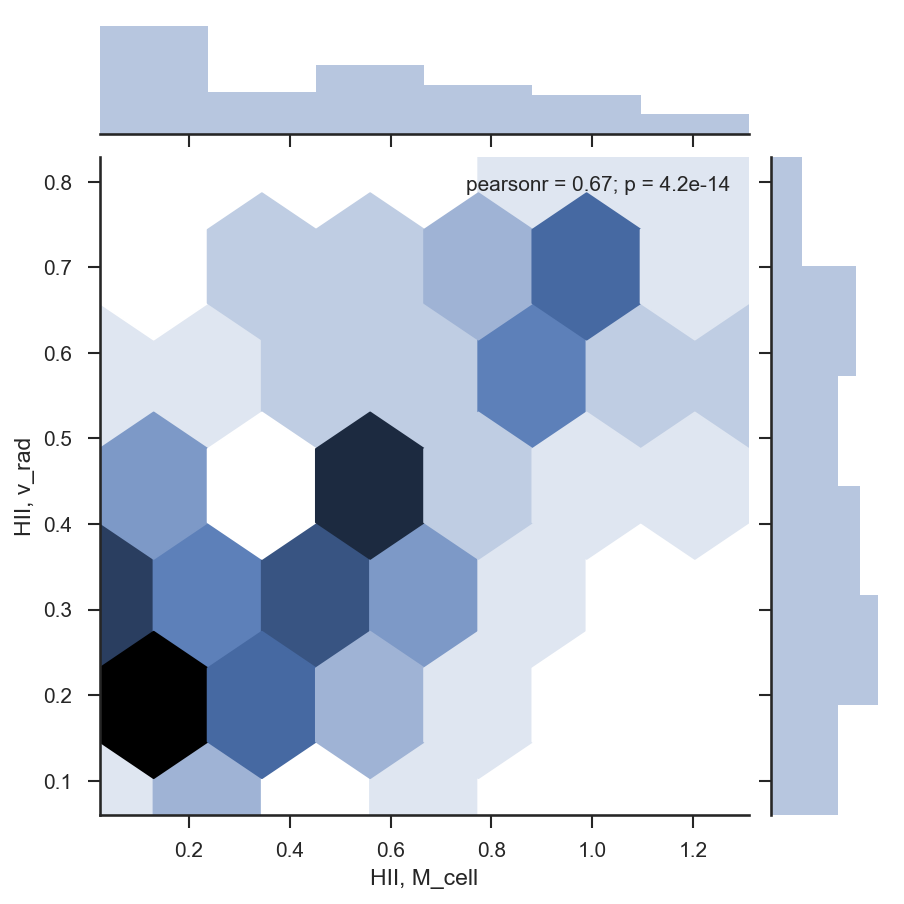

In [57]:
sns.jointplot(np.array(Fs23), np.array(Fs24), kind="hex").set_axis_labels("HII, M_cell", "HII, v_rad")

/mnt/bwpy/single/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


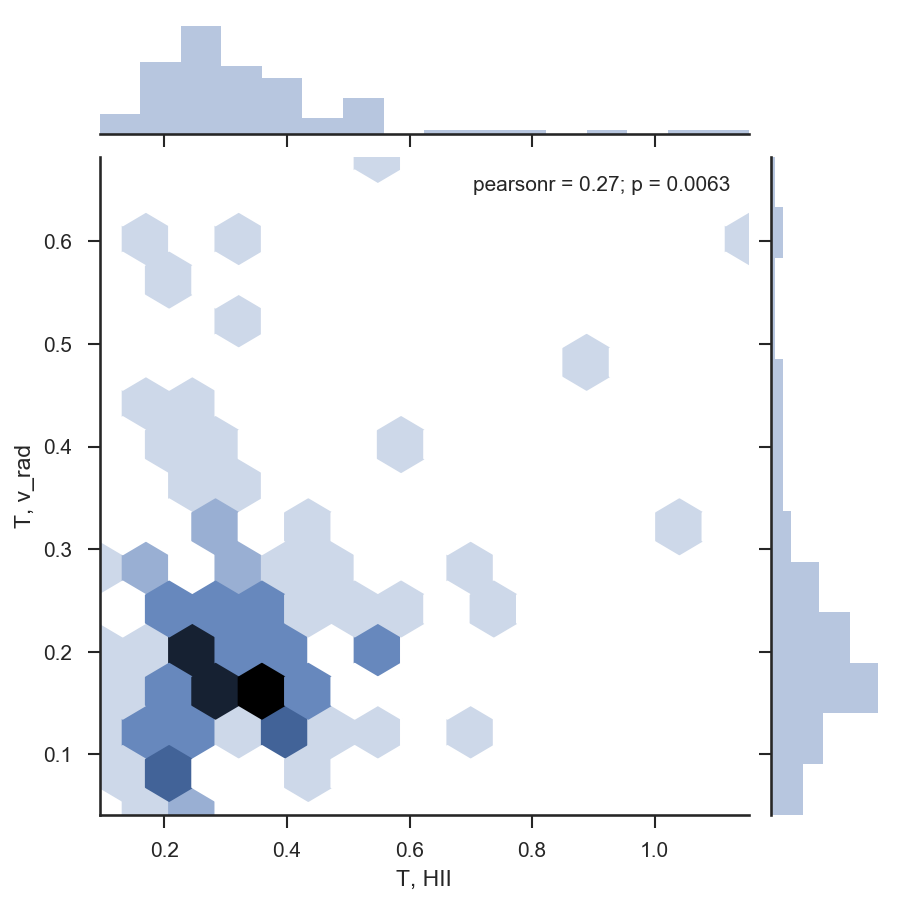

In [56]:
sns.jointplot(np.array(Fs13), np.array(Fs14), kind="hex").set_axis_labels("T, HII", "T, v_rad")